In [2]:
import sys
sys.path.append("..")
from blog_tools import data, embed
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import phate
import scprep
import warnings
import ipywidgets as widgets
import pandas as pd
font = {'size'   : 16}
mpl.rc('font', **font)

from sklearn.decomposition import PCA

algorithms = embed.__all__

In [3]:
data = pd.read_pickle('data/EmbryoidBody_counts.pkl')

In [8]:
embeddings = {}
for alg in algorithms:
    embeddings[alg.__name__] = alg(data)

In [90]:
data_pca = PCA(100).fit_transform(data)

In [91]:
embeddings_pca = {}
for alg in algorithms:
    embeddings_pca[alg.__name__] = alg(data_pca)

In [4]:
samples = np.array([idx.split('#')[1] for idx in data.index])

In [5]:
import pickle

with open('data/EmbryoidBody.embedding.pca.pkl', 'wb+') as f:
    pickle.dump(embeddings_pca, f)

In [6]:
with open('data/EmbryoidBody.embedding.pkl', 'rb') as f:
    embeddings = pickle.load(f)
with open('data/EmbryoidBody.embedding.pca.pkl', 'rb') as f:
    embeddings_pca = pickle.load(f)

In [9]:
labels = ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"]

cmap = {label:plt.cm.viridis(np.array([0,1,2,3,4])/4)[i] for i, label in enumerate(labels)}

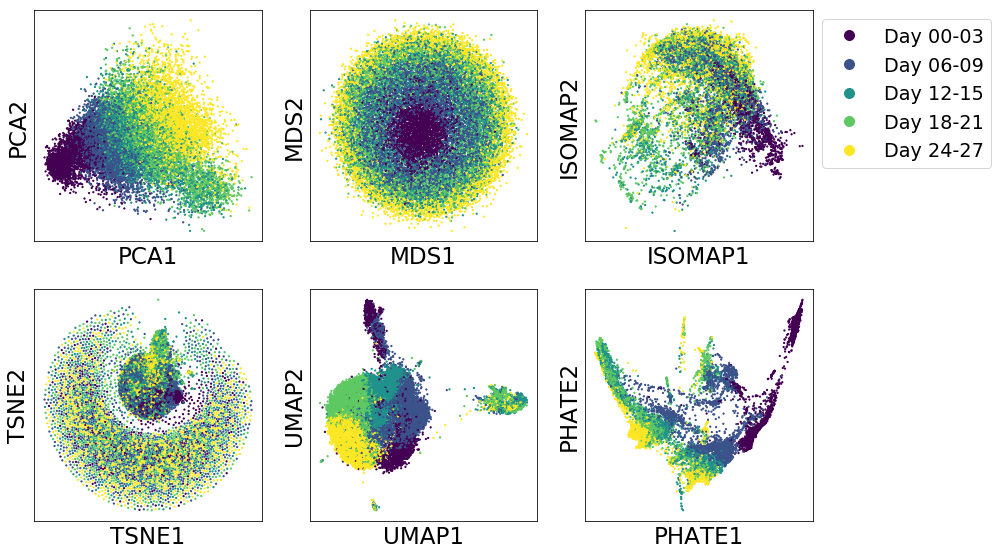

In [69]:
fig, axes = plt.subplots(2,3, figsize=(14.15,8))
axes = axes.flatten()
for alg, ax in zip(embeddings, axes):
    if alg == 'ISOMAP':
        scprep.plot.tools.generate_legend(cmap=cmap, ax=ax, bbox_to_anchor=(1,1))
    scprep.plot.scatter2d(embeddings[alg], c=samples.astype(int), cmap='viridis',
                         ticks=False, label_prefix=alg, legend=False,
                          ax=ax)
fig.tight_layout()
#fig.savefig('./img/EmbryoidBody.comparison.png', dpi=300)

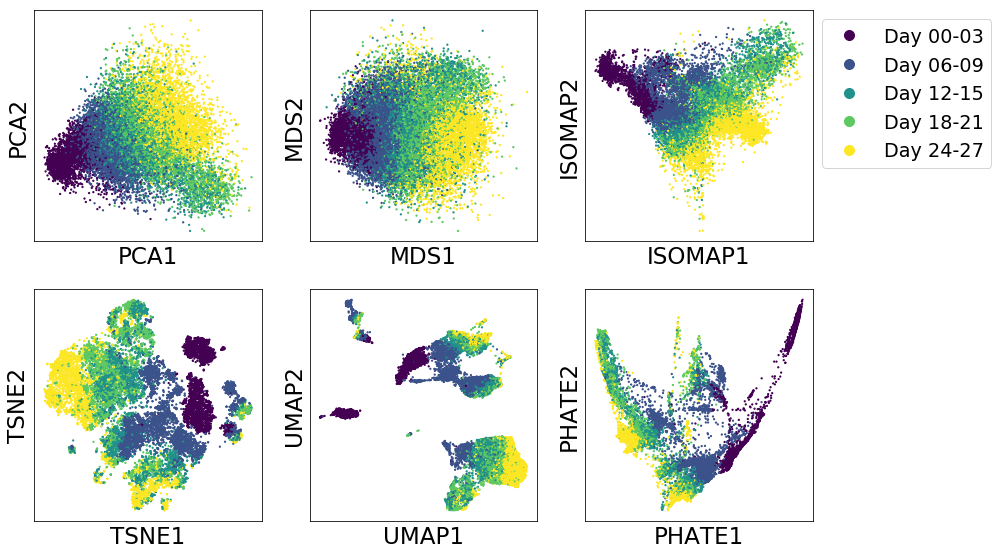

In [19]:
fig, axes = plt.subplots(2,3, figsize=(14.15,8))
axes = axes.flatten()
for alg, ax in zip(embeddings_pca, axes):
    if alg == 'ISOMAP':
        scprep.plot.tools.generate_legend(cmap=cmap, ax=ax, bbox_to_anchor=(1,1))
    scprep.plot.scatter2d(embeddings_pca[alg], c=samples.astype(int), cmap='viridis',
                         ticks=False, label_prefix=alg, legend=False,
                          ax=ax)
fig.tight_layout()
fig.savefig('./img/EmbryoidBody.comparison.png', dpi=300)

In [12]:
full_marker_genes = ['ARID3A (ENSG00000116017)', 'ASCL2 (ENSG00000183734)',  'CD34 (ENSG00000174059)',
 'CDX2 (ENSG00000165556)', 'CER1 (ENSG00000147869)', 'DLX1 (ENSG00000144355)',
 'DMRT3 (ENSG00000064218)', 'EN2 (ENSG00000164778)', 'EOMES (ENSG00000163508)',
 'FOXA2 (ENSG00000125798)', 'FOXD3-AS1 (ENSG00000230798)', 'GATA3-AS1 (ENSG00000197308)',
 'GATA4 (ENSG00000136574)', 'GATA5 (ENSG00000130700)', 'GATA6-AS1 (ENSG00000266010)',
 'GBX2 (ENSG00000168505)', 'GLI3 (ENSG00000106571)', 'HOXA2 (ENSG00000105996)',
 'HOXB1 (ENSG00000120094)', 'HOXB4 (ENSG00000182742)', 'HOXD13 (ENSG00000128714)',
 'HOXD9 (ENSG00000128709)', 'ISL1 (ENSG00000016082)', 'KLF5 (ENSG00000102554)',
 'KLF7 (ENSG00000118263)', 'LEF1 (ENSG00000138795)', 'LHX2 (ENSG00000106689)',
 'LHX5 (ENSG00000089116)', 'LMX1A (ENSG00000162761)', 'MAP2 (ENSG00000078018)',
 'MIXL1 (ENSG00000185155)', 'MYCBP (ENSG00000214114)', 'NANOG (ENSG00000111704)',
 'NES (ENSG00000132688)', 'NKX2-1 (ENSG00000136352)', 'NKX2-5 (ENSG00000183072)',
 'NKX2-8 (ENSG00000136327)', 'NPAS1 (ENSG00000130751)', 'NR2F1-AS1 (ENSG00000237187)',
 'OLIG1 (ENSG00000184221)', 'OLIG3 (ENSG00000177468)', 'ONECUT1 (ENSG00000169856)',
 'ONECUT2 (ENSG00000119547)', 'OTX2 (ENSG00000165588)', 'PAX3 (ENSG00000135903)',
 'PAX6 (ENSG00000007372)', 'PDGFRA (ENSG00000134853)', 'PECAM1 (ENSG00000261371)',
 'POU5F1 (ENSG00000204531)', 'SATB1 (ENSG00000182568)', 'SIX2 (ENSG00000170577)',
 'SIX3-AS1 (ENSG00000236502)', 'SIX6 (ENSG00000184302)', 'SOX13 (ENSG00000143842)',
 'SOX10 (ENSG00000100146)', 'SOX15 (ENSG00000129194)', 'SOX17 (ENSG00000164736)',
 'SOX9 (ENSG00000125398)', 'TTLL10 (ENSG00000162571)', 'TAL1 (ENSG00000162367)',
 'TBX15 (ENSG00000092607)', 'TBX18 (ENSG00000112837)', 'TBX5 (ENSG00000089225)',
 'TNNT2 (ENSG00000118194)', 'WT1 (ENSG00000184937)', 'ZBTB16 (ENSG00000109906)',
 'ZIC2 (ENSG00000043355)', 'ZIC5 (ENSG00000139800)', 'ACTB (ENSG00000075624)',
 'HAND1 (ENSG00000113196)']

In [13]:
full_marker_gene_symbols = np.array([g.split(' ')[0] for g in full_marker_genes])

In [14]:
full_marker_gene_symbols.shape

(70,)

In [15]:
import magic

In [16]:
data_magic = magic.MAGIC().fit_transform(data)

Calculating MAGIC...
  Running MAGIC on 16820 cells and 17445 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 8.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 33.01 seconds.
    Calculating affinities...
    Calculated affinities in 13.03 seconds.
  Calculated graph and diffusion operator in 57.50 seconds.
  Calculating imputation...
    Automatically selected t = 10
  Calculated imputation in 4.68 seconds.
Calculated MAGIC in 66.61 seconds.


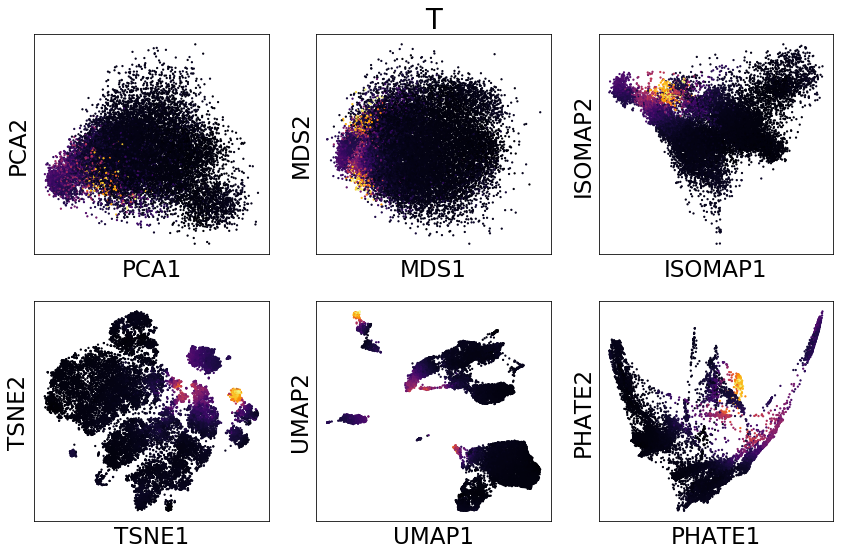

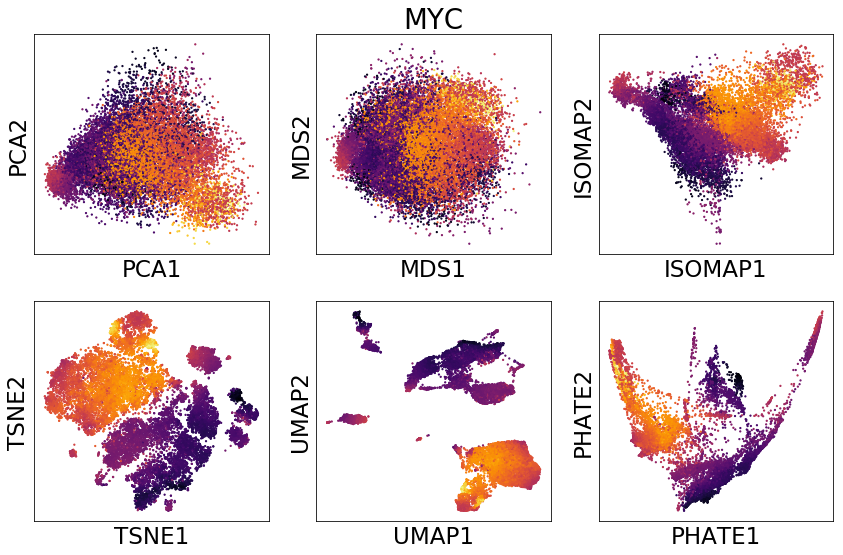

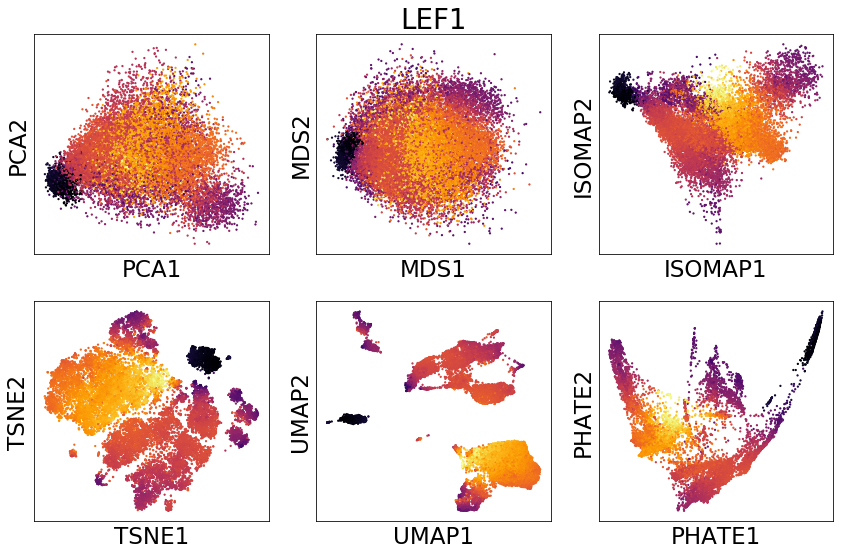

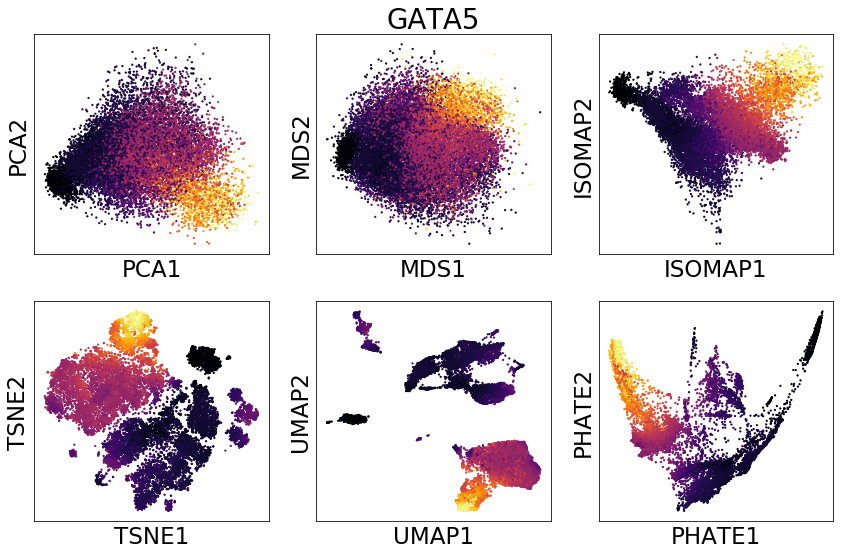

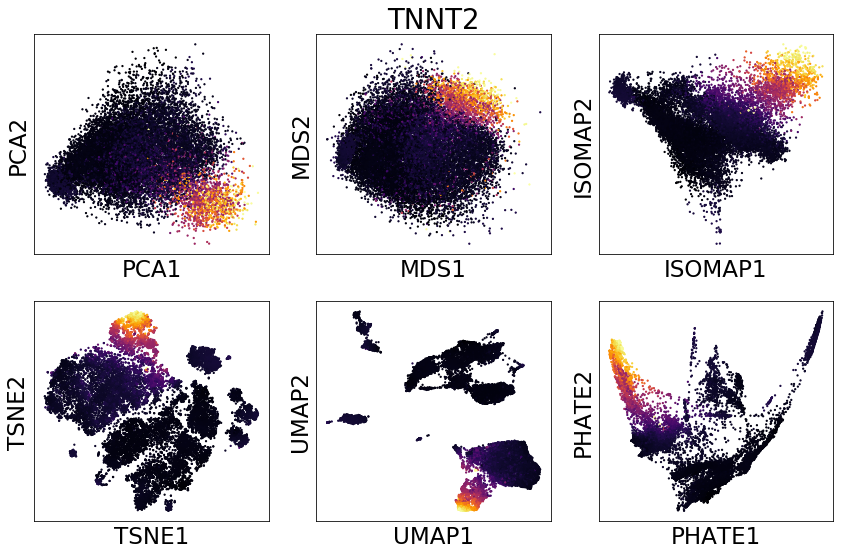

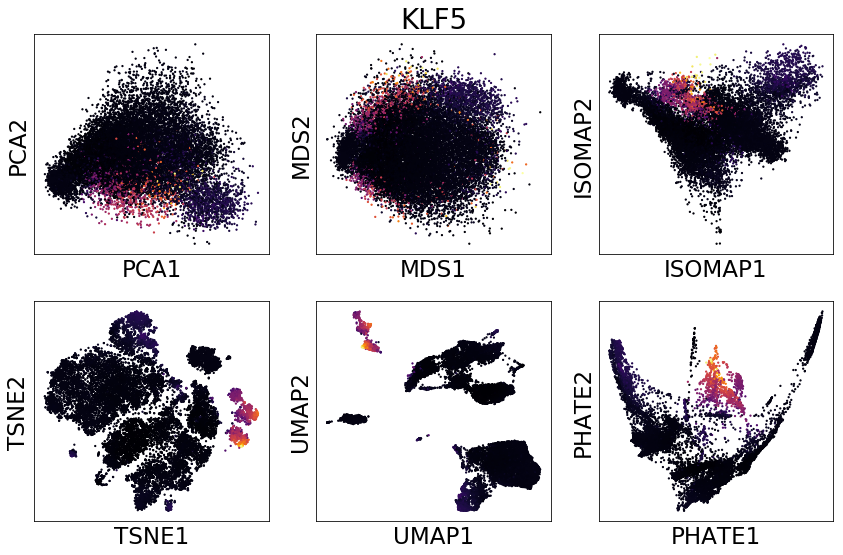

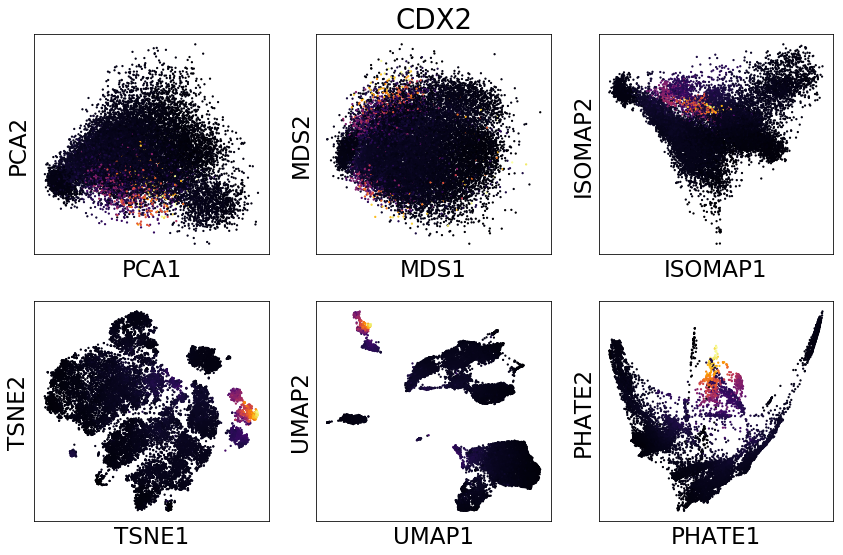

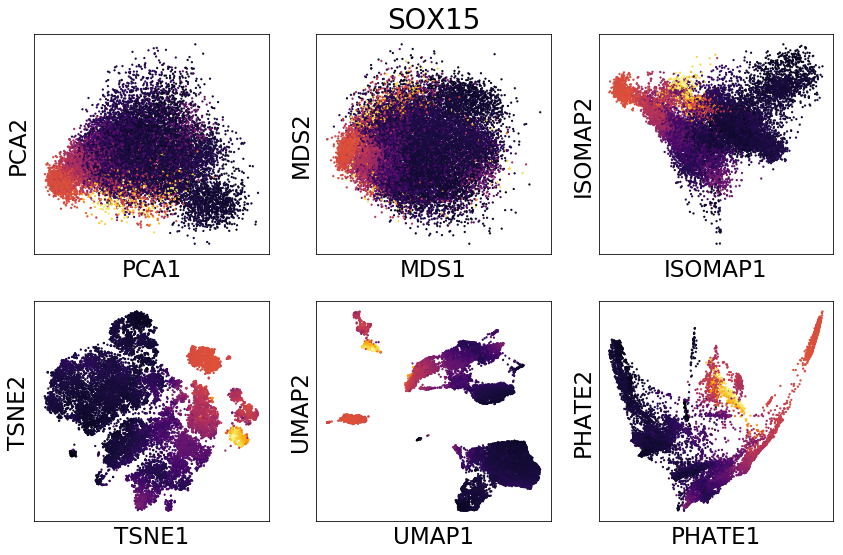

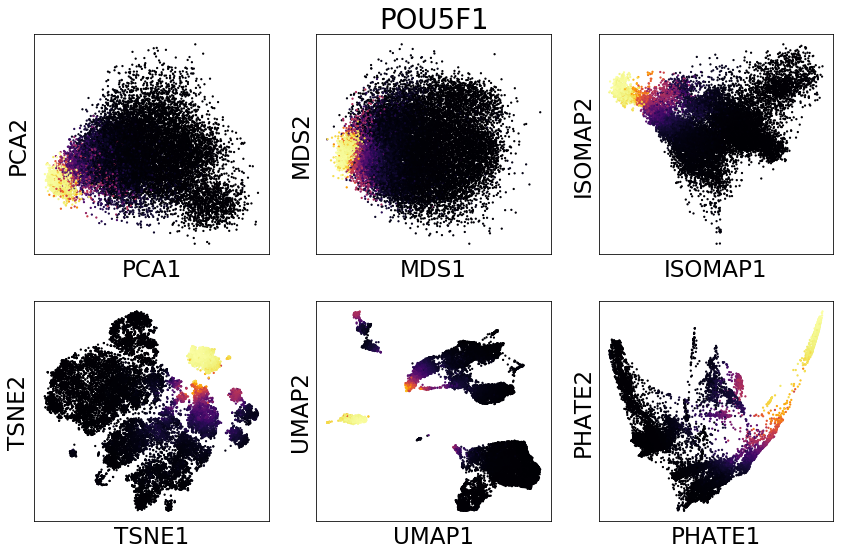

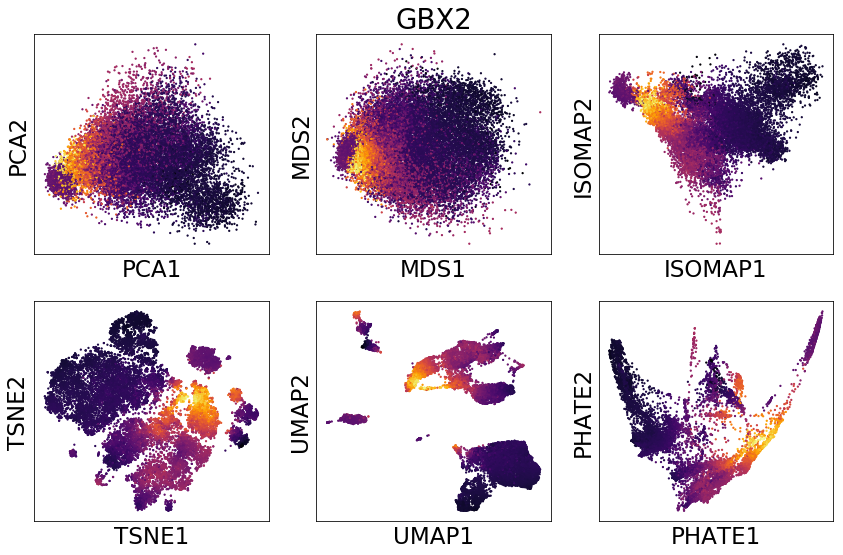

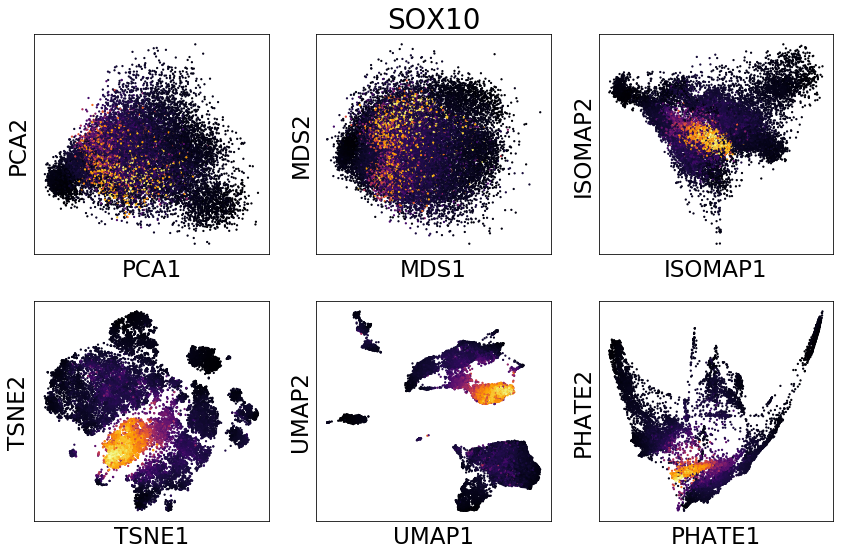

In [18]:
for gene in ['T', 'MYC', 'LEF1', 'GATA5', 'TNNT2', 'KLF5', 'CDX2', 'SOX15',
            'POU5F1', 'GBX2', 'SOX10']:

    fig, axes = plt.subplots(2,3, figsize=(12,8))
    axes = axes.flatten()
    
    exp = data_magic[gene]
    for alg, ax in zip(embeddings, axes):
        if alg == 'MDS':
            title=gene
        else:
            title=None
        if gene == 'TNNT2':
            vmax = 0.6
        else:
            vmax = None
        scprep.plot.scatter2d(embeddings_pca[alg], c=exp, cmap='inferno',
                         ticks=False, label_prefix=alg, legend=False,
                          ax=ax, title=title, vmax=vmax)
    
    fig.tight_layout()
    fig.savefig('./img/EmbryoidBody.{}.png'.format(gene), dpi=300)